<h2>Customer Segmentation using K-means Algo</h2>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [16]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Mail_Customers')

In [17]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.shape

(200, 5)

In [9]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [19]:
#Customer_id column has no relevance therefore deleting it would be better
data = data.drop('CustomerID', axis = 1)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [20]:
#renaming the columns
data = data.rename(columns = {'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'})
data.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<Axes: xlabel='Age', ylabel='count'>

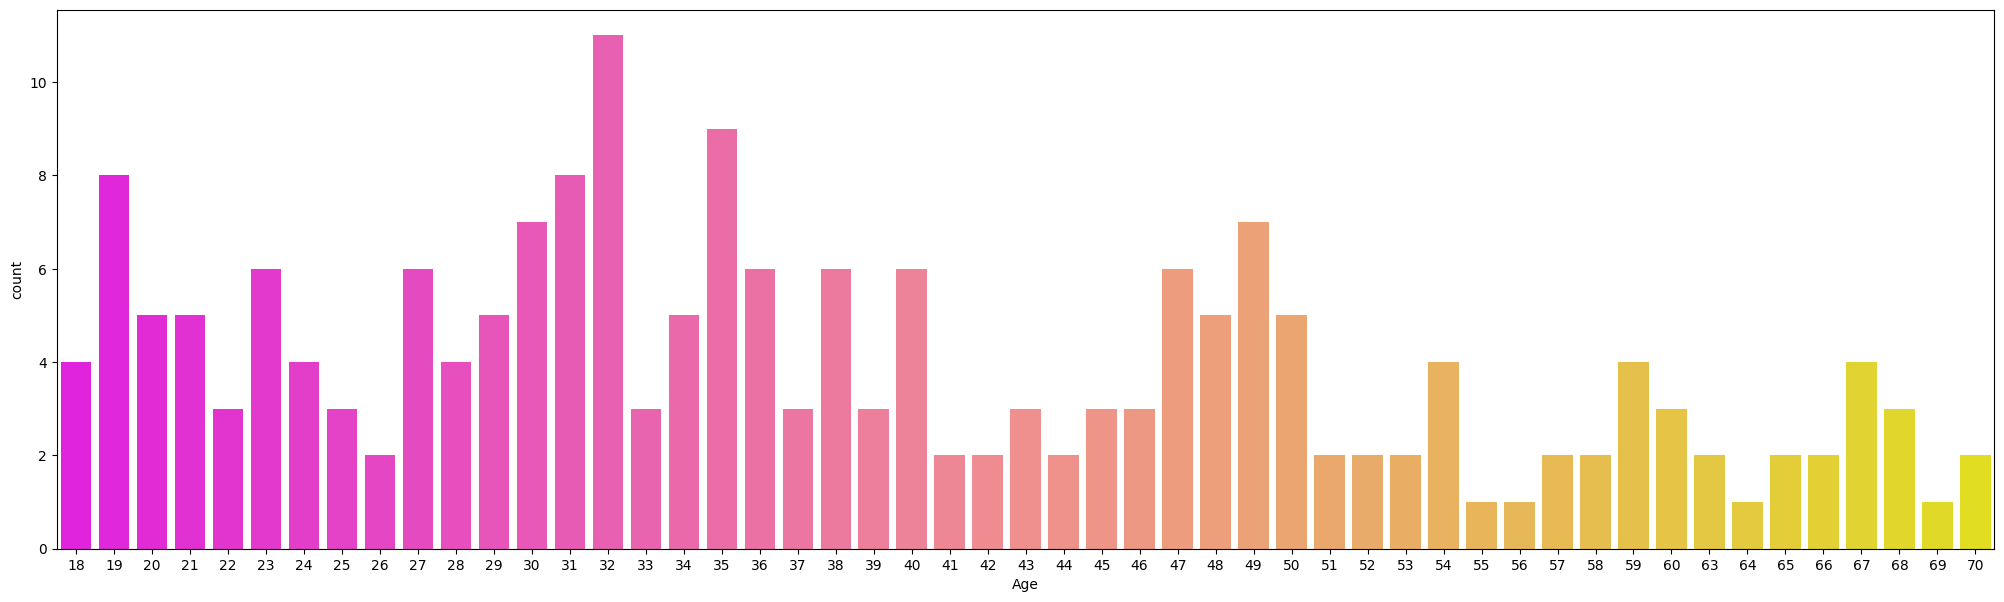

In [22]:
plt.figure(figsize = (25,7))
sns.countplot(x = data['Age'], palette = 'spring')

<h3>Subplot<h3>

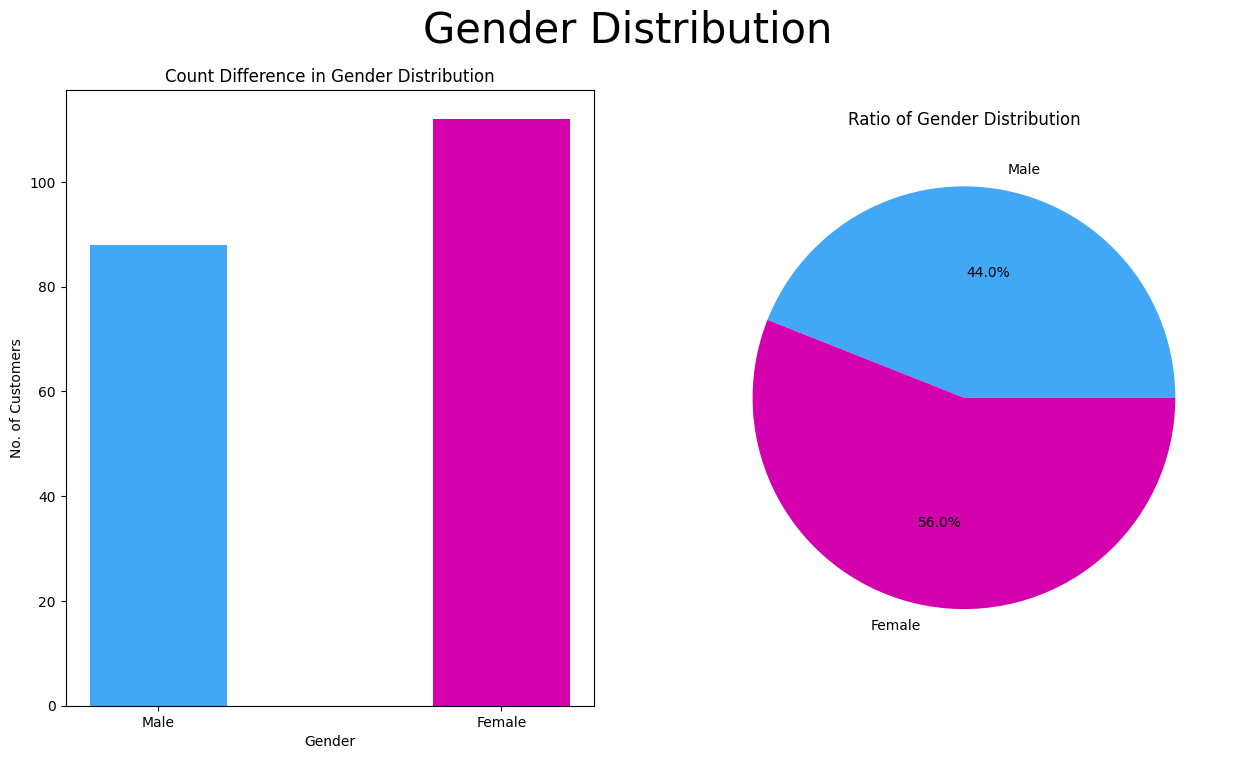

In [26]:
#subplot
labels = data['Gender'].unique()
values = data['Gender'].value_counts(ascending = True)
fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize = (15,8))

bar = ax0.bar(x=labels, height = values, width = 0.4, align = 'center', color = ['#42a7f5', '#d400ad'])
ax0.set(title = 'Count Difference in Gender Distribution', xlabel = 'Gender', ylabel = 'No. of Customers')

ax1.pie(values, labels = labels, colors = ['#42a7f5', '#d400ad'], autopct = '%1.1f%%')

ax1.set(title = 'Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize = 30);
plt.show()

<h3>Countplot<h3>

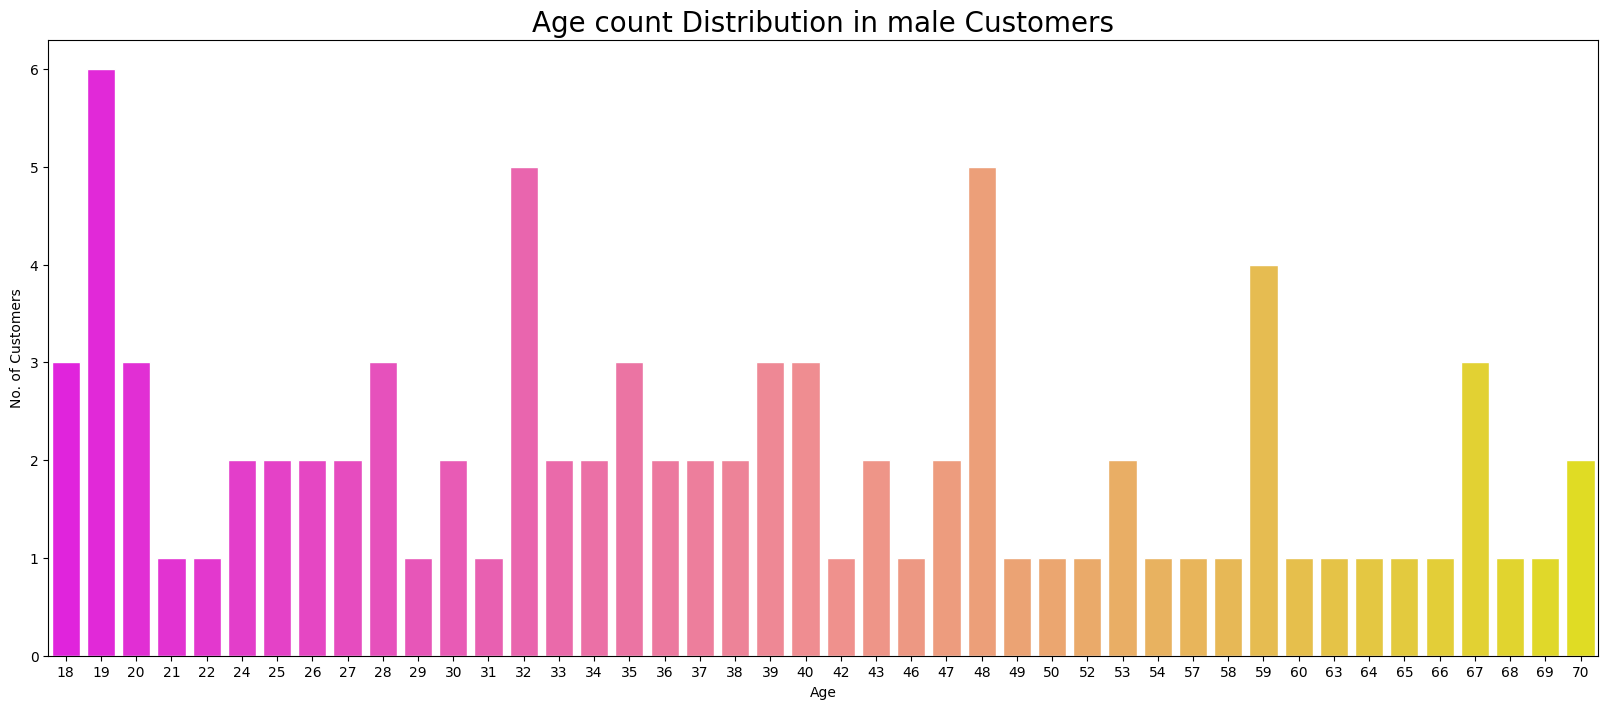

In [28]:
#Visualizing distribution of age count in male customers using a countplot
maxi = data[data['Gender'] == 'Male'].Age.value_counts().max()
mean = data[data['Gender'] == 'Male'].Age.value_counts().mean()
mini = data[data['Gender'] == 'Male'].Age.value_counts().min()

fig, ax = plt.subplots(figsize = (20, 8))
sns.set(font_scale = 1.5)
ax = sns.countplot(x = data[data['Gender'] == 'Male'].Age, palette = 'spring')
ax.set_ylabel('No. of Customers')
plt.title('Age count Distribution in male Customers', fontsize = 20)
plt.show()

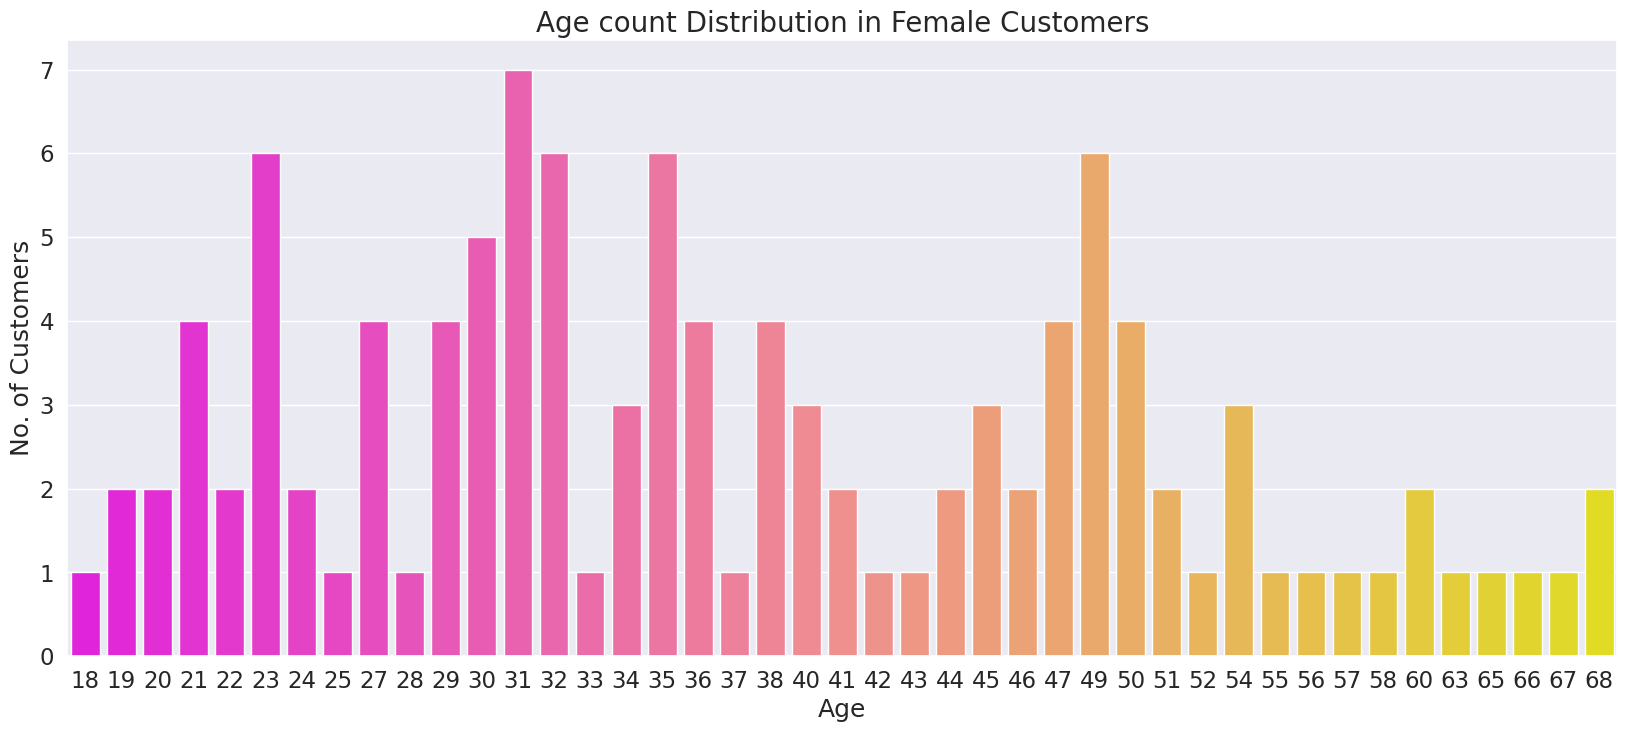

In [29]:
#Visualizing distribution of age count in Female customers using a countplot
maxi = data[data['Gender'] == 'Female'].Age.value_counts().max()
mean = data[data['Gender'] == 'Female'].Age.value_counts().mean()
mini = data[data['Gender'] == 'Female'].Age.value_counts().min()

fig, ax = plt.subplots(figsize = (20, 8))
sns.set(font_scale = 1.5)
ax = sns.countplot(x = data[data['Gender'] == 'Female'].Age, palette = 'spring')
ax.set_ylabel('No. of Customers')
plt.title('Age count Distribution in Female Customers', fontsize = 20)
plt.show()

<h3>Histogram</h3>

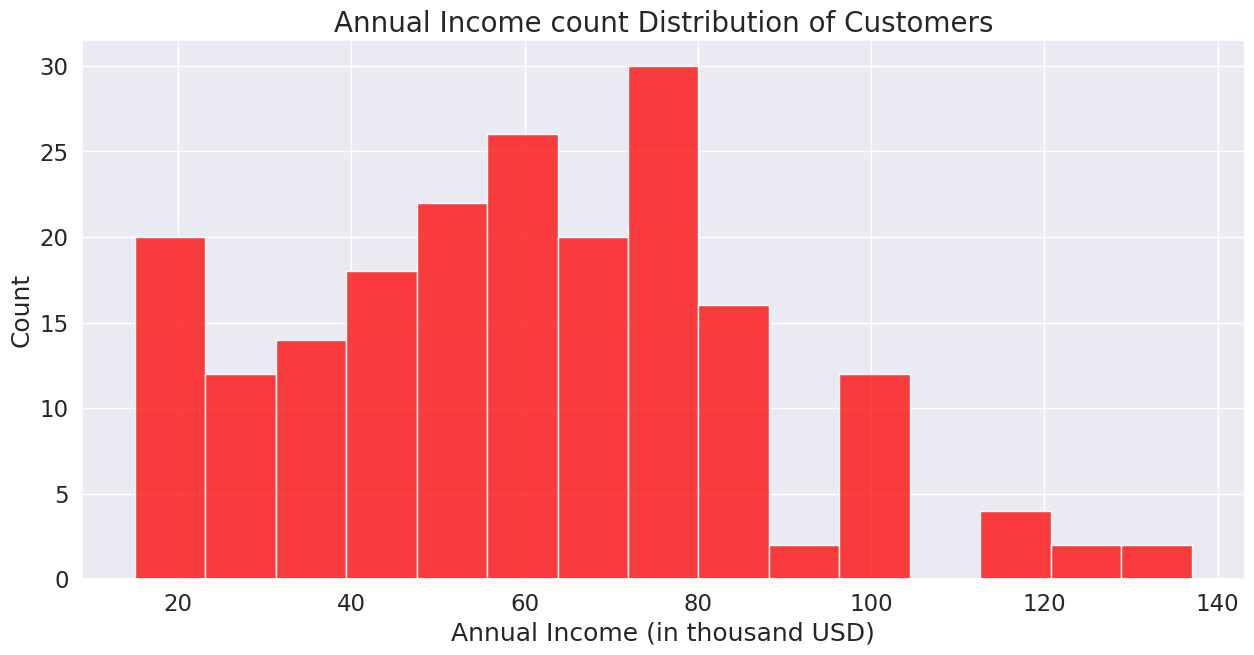

In [33]:
#Visualizing Annual Income count value distribution on a histogram
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale = 1.5)
ax = sns.histplot(data['Annual_Income'], bins = 15, ax = ax, color = 'red')
ax.set_xlabel('Annual Income (in thousand USD)')
plt.title('Annual Income count Distribution of Customers', fontsize = 20)
plt.show()

<h3>Scatter plot<h3>

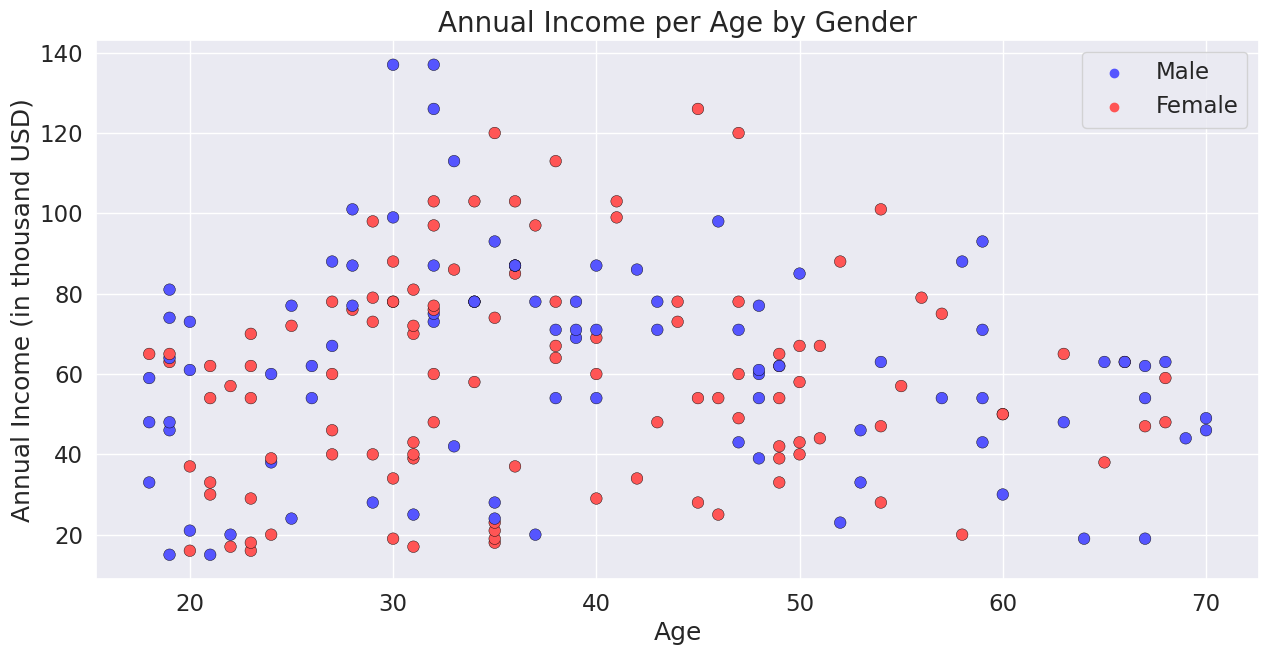

In [35]:
#Visualizing annual Income per age by gender on a scatter plot.
fig, ax = plt.subplots(figsize = (15, 7))
sns.set(font_scale = 1.5)
ax = sns.scatterplot(y = data['Annual_Income'], x = data['Age'], hue = data['Gender'], palette = 'seismic', s = 70, edgecolor = 'black', linewidth = 0.3)
ax.set_ylabel('Annual Income (in thousand USD)')
ax.legend(loc = 'upper right')

plt.title('Annual Income per Age by Gender', fontsize = 20)
plt.show()

<h2>Applying K-Means<h2>

In [37]:
clustering_data = data.iloc[:, [2,3]]

In [39]:
#Determining No. of clusters Required within the cluster sum of square(wcss)
wcss=[]
for i in range(1, 30):
  km = KMeans(i, n_init = 10)
  km.fit(clustering_data)
  wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 183499.07470289, 106348.37306211,  73679.78903949,
        44448.45544793,  37233.81451071,  31605.86838023,  25004.83031471,
        21850.16528259,  19657.7836087 ,  17549.69929191,  15838.71778551,
        14589.49268259,  12944.68210123,  12195.26383911,  10848.92599369,
        10091.99861776,   9145.20308513,   8599.15734127,   8217.44749164,
         7655.06695739,   7138.54206349,   6881.37190587,   6453.62853813,
         6074.25267313,   5644.77546349,   5489.3046398 ,   5184.55048285,
         5029.62883662])

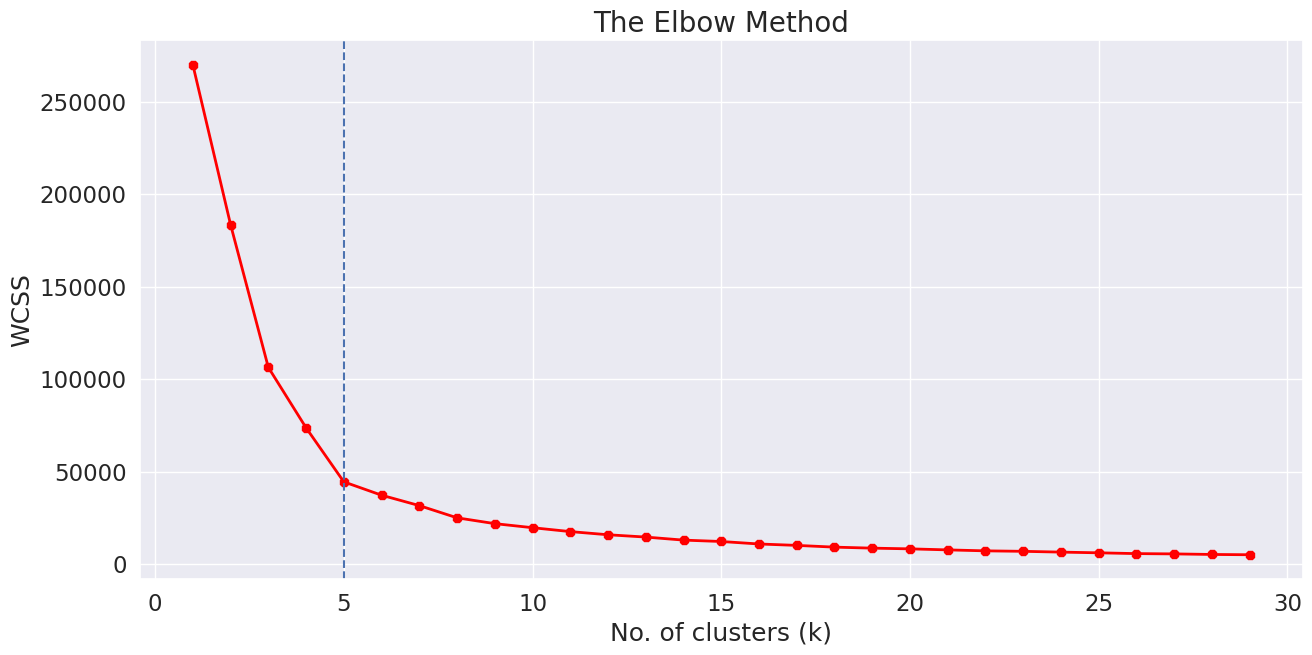

In [40]:
#Elbow Method
fig, ax = plt.subplots(figsize = (15, 7))
ax = plt.plot(range(1, 30), wcss, linewidth = 2, color = "red", marker = "8")
plt.axvline(x = 5, ls = '--')
plt.ylabel('WCSS')
plt.xlabel('No. of clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [41]:
#fitting
kms = KMeans(n_clusters = 5, init = 'k-means++')
kms.fit(clustering_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [42]:
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Annual_Income,Spending_Score,Cluster_Prediction
0,15,39,0
1,15,81,2
2,16,6,0
3,16,77,2
4,17,40,0
